<a href="https://colab.research.google.com/github/noviadinaf/tes/blob/main/Copy_of_%5BKM_Aug23_DA_W5%5D_Lecture_3_Data_Cleaning_%26_EDA_Section_Medan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA using Python

In this last day, we want to use EDA techniques in Python to answer the following questions:
- What is the typical demographic characteristics of Bank Berka's clients?
- How is the current state of Bank Berka’s loan book?
- What is the trend of account opening, account balance and loan origination over time?
- What is transaction behaviour of Bank Berka's clients?
---

# ALL INSIGHTS

**Client**
- There are 4500 clients of Bank Berka, split almost equal between men and women
- Almost 60% of clients coming from Moravia, Central Bohemia, and Prague area
- More than 90% of clients chose to receive monthly statement
- Average age is 44 years old, but the largest age group is 20-30s and above 60s
- Owner of debit cards tends to be younger
- Account opening tends to be happened in 2013 and 2016, with 2017 is challenging years for new account acquisition.

**Loan**
- There are 682 loan in the loan book, with 234 remains active
- The volume of loan book is 79.6 million krona
- The average ticket size is 116.8k krona
- Average annual interest rate is 15%, with average tenor 36 months
- The volume of active loan is 60.3 million krona
- The loan acquisition in 2018 is remarkably lower than 2017

**Transaction**
- The end-of-month balance is always increasing every month, with exception of December and mid-year.
- The EOM balance stands at almost 200 million krona by end of December 2018

# Preambul

In [ ]:
# LIBRARY WE HAVE LEARNED
import gdown
import pandas as pd


# NEW LIBRARY TODAY
import numpy as np # Berkaitan dengan aljabar/kalkulasi/operasi-operasi numerical
from datetime import datetime # Berkaitan dengan tipe data datetime
import matplotlib.pyplot as plt # Bikin grafik
import seaborn as sns # Bikin grafik

# Data Cleaning

In [ ]:
# Data from yesterday
GSHEET_URL = 'https://docs.google.com/spreadsheets/d/1ZhGyxtH8QhtGb1wOKqLoWrz7zy1g3fgFZ0R6kBqy67k/edit#gid=0'
GSHEET_URL_CSV = GSHEET_URL.replace('/edit#gid=', '/export?format=csv&gid=')

df_url = pd.read_csv(GSHEET_URL_CSV)
df_url

,id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,...,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
0,68466926,10000,36 months,6.49,306.45,A,A2,SERVICE MANAGER,6 years,RENT,...,Apr-02,14,1,10464.0,34.5,23.0,w,Individual,1,1
1,68466961,28000,36 months,6.49,858.05,A,A2,Senior Manager,10+ years,MORTGAGE,...,May-84,16,0,51507.0,64.5,24.0,w,Individual,2,0
2,68354783,9600,36 months,7.49,298.58,A,A4,tech,8 years,MORTGAGE,...,Jun-96,7,0,7722.0,59.4,9.0,w,Individual,0,0
3,68466916,25000,36 months,7.49,777.55,A,A4,Sales Manager,10+ years,MORTGAGE,...,Dec-01,9,0,20862.0,54.3,19.0,w,Individual,3,0
4,68476715,6000,36 months,7.49,186.61,A,A4,Analyst,10+ years,MORTGAGE,...,May-94,9,0,8563.0,72.0,16.0,w,Individual,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,68436934,23975,60 months,19.89,633.73,E,E3,Principal,10+ years,RENT,...,Jun-95,10,0,44807.0,94.9,19.0,w,Individual,3,0
96,68376217,23100,60 months,20.50,618.46,E,E4,Regional Sales Direcdtor,2 years,OWN,...,Aug-86,11,0,20594.0,94.9,24.0,w,Individual,2,0
97,68476807,10400,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,...,Jun-98,12,0,21929.0,64.5,35.0,w,Individual,6,0
98,68341789,24250,60 months,24.24,701.01,F,F3,hvac technician,4 years,MORTGAGE,...,Apr-07,18,0,24799.0,65.3,21.0,w,Individual,2,0


In [ ]:
df_url.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    100 non-null    int64  
 1   loan_amnt             100 non-null    int64  
 2   term                  100 non-null    object 
 3   int_rate              100 non-null    float64
 4   installment           100 non-null    float64
 5   grade                 100 non-null    object 
 6   sub_grade             100 non-null    object 
 7   emp_title             97 non-null     object 
 8   emp_length            97 non-null     object 
 9   home_ownership        100 non-null    object 
 10  annual_inc            100 non-null    int64  
 11  verification_status   100 non-null    object 
 12  issue_d               100 non-null    object 
 13  loan_status           100 non-null    object 
 14  purpose               100 non-null    object 
 15  title                 94

In [ ]:
df_url.isna()

,id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,...,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
96,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
97,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
98,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df_url.isna().sum()

id                      0
loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               3
emp_length              3
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
title                   6
zip_code                0
addr_state              0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               1
revol_util              0
total_acc               1
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
dtype: int64

In [ ]:
df_url.isnull().sum()

id                      0
loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               3
emp_length              3
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
title                   6
zip_code                0
addr_state              0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               1
revol_util              0
total_acc               1
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
dtype: int64

In [ ]:
df_url[ df_url.isnull().any(axis='columns') ]

,id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,...,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
11,68416953,1500,36 months,6.49,45.97,A,A2,NaN,NaN,MORTGAGE,...,Dec-87,12,0,3717.0,21.2,37.0,w,Individual,4,0
16,68377020,15000,36 months,5.32,451.73,A,A1,NaN,NaN,RENT,...,Apr-93,30,0,41593.0,21.4,47.0,w,Individual,2,0
20,68341763,20000,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,...,Aug-00,6,0,7869.0,56.2,18.0,w,Joint App,5,0
30,68366663,24000,60 months,9.80,507.58,B,B3,NaN,NaN,OWN,...,Oct-82,9,0,3454.0,10.3,21.0,w,Individual,2,0
43,66310712,35000,60 months,14.85,829.90,C,C5,Information Systems Officer,10+ years,MORTGAGE,...,Sep-08,13,0,7802.0,11.6,NaN,w,Individual,1,0
47,68338832,1400,36 months,12.88,47.10,C,C2,Logistics Manager,3 years,MORTGAGE,...,Jun-96,17,0,37828.0,67.2,24.0,w,Individual,4,0
69,68340446,14000,60 months,14.85,331.96,C,C5,Accountant,2 years,MORTGAGE,...,Aug-09,11,0,12718.0,73.9,24.0,w,Individual,0,0
80,68566951,10000,60 months,17.97,253.78,D,D4,Educator,2 years,MORTGAGE,...,Apr-01,14,0,NaN,78.0,28.0,w,Individual,6,0
81,68446771,7200,36 months,15.77,252.32,D,D1,Bank Officer Senior Customer Care Spec.,< 1 year,RENT,...,Jun-05,24,1,5938.0,69.0,43.0,w,Individual,0,0
94,68341799,17600,60 months,19.89,465.22,E,E3,RN,< 1 year,RENT,...,Jun-06,7,0,12900.0,102.4,25.0,w,Individual,0,0


In [ ]:
# handling missing value
df_url_copy = df_url.copy()
df_url_copy

,id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,...,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
0,68466926,10000,36 months,6.49,306.45,A,A2,SERVICE MANAGER,6 years,RENT,...,Apr-02,14,1,10464.0,34.5,23.0,w,Individual,1,1
1,68466961,28000,36 months,6.49,858.05,A,A2,Senior Manager,10+ years,MORTGAGE,...,May-84,16,0,51507.0,64.5,24.0,w,Individual,2,0
2,68354783,9600,36 months,7.49,298.58,A,A4,tech,8 years,MORTGAGE,...,Jun-96,7,0,7722.0,59.4,9.0,w,Individual,0,0
3,68466916,25000,36 months,7.49,777.55,A,A4,Sales Manager,10+ years,MORTGAGE,...,Dec-01,9,0,20862.0,54.3,19.0,w,Individual,3,0
4,68476715,6000,36 months,7.49,186.61,A,A4,Analyst,10+ years,MORTGAGE,...,May-94,9,0,8563.0,72.0,16.0,w,Individual,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,68436934,23975,60 months,19.89,633.73,E,E3,Principal,10+ years,RENT,...,Jun-95,10,0,44807.0,94.9,19.0,w,Individual,3,0
96,68376217,23100,60 months,20.50,618.46,E,E4,Regional Sales Direcdtor,2 years,OWN,...,Aug-86,11,0,20594.0,94.9,24.0,w,Individual,2,0
97,68476807,10400,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,...,Jun-98,12,0,21929.0,64.5,35.0,w,Individual,6,0
98,68341789,24250,60 months,24.24,701.01,F,F3,hvac technician,4 years,MORTGAGE,...,Apr-07,18,0,24799.0,65.3,21.0,w,Individual,2,0


In [ ]:
# handling missing value - remove
df_url_copy = df_url_copy.dropna()

In [ ]:
df_url_copy.isnull().sum()

id                      0
loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
title                   0
zip_code                0
addr_state              0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
dtype: int64

In [ ]:
# handling missing value - fill the missing value
# handling missing value
df_url_copy_2 = df_url.copy()

In [ ]:
df_url_copy_2 = df_url_copy_2.fillna('Unknown')
df_url_copy_2

,id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,...,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
0,68466926,10000,36 months,6.49,306.45,A,A2,SERVICE MANAGER,6 years,RENT,...,Apr-02,14,1,10464.0,34.5,23.0,w,Individual,1,1
1,68466961,28000,36 months,6.49,858.05,A,A2,Senior Manager,10+ years,MORTGAGE,...,May-84,16,0,51507.0,64.5,24.0,w,Individual,2,0
2,68354783,9600,36 months,7.49,298.58,A,A4,tech,8 years,MORTGAGE,...,Jun-96,7,0,7722.0,59.4,9.0,w,Individual,0,0
3,68466916,25000,36 months,7.49,777.55,A,A4,Sales Manager,10+ years,MORTGAGE,...,Dec-01,9,0,20862.0,54.3,19.0,w,Individual,3,0
4,68476715,6000,36 months,7.49,186.61,A,A4,Analyst,10+ years,MORTGAGE,...,May-94,9,0,8563.0,72.0,16.0,w,Individual,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,68436934,23975,60 months,19.89,633.73,E,E3,Principal,10+ years,RENT,...,Jun-95,10,0,44807.0,94.9,19.0,w,Individual,3,0
96,68376217,23100,60 months,20.50,618.46,E,E4,Regional Sales Direcdtor,2 years,OWN,...,Aug-86,11,0,20594.0,94.9,24.0,w,Individual,2,0
97,68476807,10400,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,...,Jun-98,12,0,21929.0,64.5,35.0,w,Individual,6,0
98,68341789,24250,60 months,24.24,701.01,F,F3,hvac technician,4 years,MORTGAGE,...,Apr-07,18,0,24799.0,65.3,21.0,w,Individual,2,0


In [ ]:
df_url_copy_2.loc[16]

id                                68377020
loan_amnt                            15000
term                             36 months
int_rate                              5.32
installment                         451.73
grade                                    A
sub_grade                               A1
emp_title                          Unknown
emp_length                         Unknown
home_ownership                        RENT
annual_inc                           80000
verification_status           Not Verified
issue_d                             Dec-15
loan_status                     Fully Paid
purpose                 debt_consolidation
title                   Debt consolidation
zip_code                             236xx
addr_state                              VA
dti                                  20.18
earliest_cr_line                    Apr-93
open_acc                                30
pub_rec                                  0
revol_bal                          41593.0
revol_util 

In [ ]:
df_url_copy_2['emp_length'].mode()[0]

'10+ years'

In [ ]:
df_url_copy_2['total_acc'].median()

TypeError: ignored

In [ ]:
df_url_copy_2['emp_length'] = df_url_copy_2['emp_length'].fillna( df_url_copy_2['emp_length'].mode()[0] )
df_url_copy_2.loc[16]

id                                68377020
loan_amnt                            15000
term                             36 months
int_rate                              5.32
installment                         451.73
grade                                    A
sub_grade                               A1
emp_title                              NaN
emp_length                       10+ years
home_ownership                        RENT
annual_inc                           80000
verification_status           Not Verified
issue_d                             Dec-15
loan_status                     Fully Paid
purpose                 debt_consolidation
title                   Debt consolidation
zip_code                             236xx
addr_state                              VA
dti                                  20.18
earliest_cr_line                    Apr-93
open_acc                                30
pub_rec                                  0
revol_bal                          41593.0
revol_util 

In [ ]:
df_url_copy_2['total_acc'] = df_url_copy_2['total_acc'].fillna( df_url_copy_2['total_acc'].median() )

In [ ]:
df_url_copy_2.isna().sum()

id                      0
loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               3
emp_length              3
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
title                   6
zip_code                0
addr_state              0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               1
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
dtype: int64

In [ ]:
df_url.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Length: 100, dtype: bool

In [ ]:
df_url[ df_url.duplicated() ]

,id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,...,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
18,68446746,12000,36 months,5.32,361.38,A,A1,Network Operation Engineer,4 years,MORTGAGE,...,Sep-07,8,0,3172.0,17.2,19.0,w,Individual,2,0
76,68407333,16250,60 months,13.44,373.41,C,C3,Radiology Tech.,2 years,MORTGAGE,...,Apr-90,15,0,27336.0,94.9,21.0,w,Individual,2,0


In [ ]:
df_url[ df_url['id'] == 68446746 ]

,id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,...,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
17,68446746,12000,36 months,5.32,361.38,A,A1,Network Operation Engineer,4 years,MORTGAGE,...,Sep-07,8,0,3172.0,17.2,19.0,w,Individual,2,0
18,68446746,12000,36 months,5.32,361.38,A,A1,Network Operation Engineer,4 years,MORTGAGE,...,Sep-07,8,0,3172.0,17.2,19.0,w,Individual,2,0


In [ ]:
df_url[ df_url['id'].duplicated() ]

,id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,...,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
18,68446746,12000,36 months,5.32,361.38,A,A1,Network Operation Engineer,4 years,MORTGAGE,...,Sep-07,8,0,3172.0,17.2,19.0,w,Individual,2,0
76,68407333,16250,60 months,13.44,373.41,C,C3,Radiology Tech.,2 years,MORTGAGE,...,Apr-90,15,0,27336.0,94.9,21.0,w,Individual,2,0


# Reading pickled file

Today's file can be downloaded from the following source:
- client: https://drive.google.com/file/d/164mt9FqYcdMsia9Rz2CCrKkeF3I2WNUw/view?usp=sharing
- loan: https://drive.google.com/file/d/1DQV6FGyaQOckU3IbYs7XJIyPCKpD3e1d/view?usp=sharing
- transactions: https://drive.google.com/file/d/1ptbBlBlWT-5fbklf5mxwfNiGG-8Gwcnp/view?usp=sharing

We will also use clean `demog` data
- demog: https://drive.google.com/file/d/1u08Ls6U9qiQnoIUEoMRe4KoKhanIpFMY/view?usp=sharing

In [ ]:
# Let's download the data files using gdown
url = "https://drive.google.com/file/d/164mt9FqYcdMsia9Rz2CCrKkeF3I2WNUw/view?usp=sharing"
output = "client.pickle"
gdown.download(url, output, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=164mt9FqYcdMsia9Rz2CCrKkeF3I2WNUw
To: /content/client.pickle
100%|██████████| 664k/664k [00:00<00:00, 94.4MB/s]


'client.pickle'

In [ ]:
# Let's download the data files using gdown
url = "https://drive.google.com/file/d/1DQV6FGyaQOckU3IbYs7XJIyPCKpD3e1d/view?usp=sharing"
output = "loan.pickle"
gdown.download(url, output, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1DQV6FGyaQOckU3IbYs7XJIyPCKpD3e1d
To: /content/loan.pickle
100%|██████████| 52.0k/52.0k [00:00<00:00, 66.6MB/s]


'loan.pickle'

In [ ]:
# Let's download the data files using gdown
url = "https://drive.google.com/file/d/1ptbBlBlWT-5fbklf5mxwfNiGG-8Gwcnp/view?usp=sharing"
output = "transactions.pickle"
gdown.download(url, output, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1ptbBlBlWT-5fbklf5mxwfNiGG-8Gwcnp
To: /content/transactions.pickle
100%|██████████| 72.5M/72.5M [00:00<00:00, 255MB/s]


'transactions.pickle'

In [ ]:
# Let's download the data files using gdown
url = "https://drive.google.com/file/d/1u08Ls6U9qiQnoIUEoMRe4KoKhanIpFMY/view?usp=sharing"
output = "demog.csv"
gdown.download(url, output, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1u08Ls6U9qiQnoIUEoMRe4KoKhanIpFMY
To: /content/demog.csv
100%|██████████| 6.47k/6.47k [00:00<00:00, 11.1MB/s]


'demog.csv'

# Convert pickled file to Pandas DataFrame

In [ ]:
client = pd.read_pickle('/content/client.pickle')
client

,account_id,client_id,client_district_id,gender,birth_date,acct_district_id,acct_opening_dt,statement_frequency,birth_day,birth_month,...,birth_day_name,birth_month_name,client_age,MOB,client_district_new,card_type,issued,district_id,district_name,region
0,576,692,NaN,F,1956-01-11,55,2013-01-01,MONTHLY STATEMENT,11,1,...,Wednesday,January,63.0,72.0,55.0,NaN,NaN,55,Brno - venkov,south Moravia
1,3818,4601,NaN,M,1955-04-02,74,2013-01-01,MONTHLY STATEMENT,2,4,...,Saturday,April,64.0,72.0,74.0,NaN,NaN,74,Ostrava - mesto,north Moravia
2,704,844,NaN,M,1965-01-14,55,2013-01-01,MONTHLY STATEMENT,14,1,...,Thursday,January,54.0,72.0,55.0,NaN,NaN,55,Brno - venkov,south Moravia
3,2378,2873,NaN,F,1995-03-24,16,2013-01-01,MONTHLY STATEMENT,24,3,...,Friday,March,24.0,72.0,16.0,NaN,NaN,16,Jindrichuv Hradec,south Bohemia
4,2632,3177,NaN,M,1958-08-12,24,2013-01-02,MONTHLY STATEMENT,12,8,...,Tuesday,August,60.0,72.0,24.0,NaN,NaN,24,Karlovy Vary,west Bohemia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,124,149,55.0,M,1968-06-27,55,2017-12-28,MONTHLY STATEMENT,27,6,...,Thursday,June,51.0,12.0,55.0,NaN,NaN,55,Brno - venkov,south Moravia
4496,3958,4774,59.0,M,1971-08-14,59,2017-12-28,MONTHLY STATEMENT,14,8,...,Saturday,August,47.0,12.0,59.0,NaN,NaN,59,Kromeriz,south Moravia
4497,777,929,30.0,M,1955-04-23,30,2017-12-28,MONTHLY STATEMENT,23,4,...,Saturday,April,64.0,12.0,30.0,NaN,NaN,30,Sokolov,west Bohemia
4498,1573,1906,63.0,M,1942-07-07,63,2017-12-29,MONTHLY STATEMENT,7,7,...,Tuesday,July,76.0,12.0,63.0,NaN,NaN,63,Vyskov,south Moravia


In [ ]:
# Pickling preserves the data type in df
client.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4500 entries, 0 to 4499
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   account_id           4500 non-null   int64         
 1   client_id            4500 non-null   int64         
 2   client_district_id   3361 non-null   float64       
 3   gender               4500 non-null   object        
 4   birth_date           4500 non-null   datetime64[ns]
 5   acct_district_id     4500 non-null   int64         
 6   acct_opening_dt      4500 non-null   datetime64[ns]
 7   statement_frequency  4500 non-null   object        
 8   birth_day            4500 non-null   int64         
 9   birth_month          4500 non-null   int64         
 10  birth_year           4500 non-null   int64         
 11  birth_day_name       4500 non-null   object        
 12  birth_month_name     4500 non-null   object        
 13  client_age           4500 non-nul

In [ ]:
loan = pd.read_pickle('/content/loan.pickle')
loan

,loan_id,account_id,date,principal,duration_month,annual_interest_rate,monthly_payment,total_payment,status,end_date
0,5314,1787,2013-07-05,88833.0,12,0.153592,8033.0,96396,B,2014-07-05
1,5316,1801,2013-07-11,141131.0,36,0.108437,4610.0,165960,A,2016-07-11
2,6863,9188,2013-07-28,94126.0,60,0.125077,2118.0,127080,A,2018-07-28
3,5325,1843,2013-08-03,73372.0,36,0.255593,2939.0,105804,A,2016-08-03
4,7240,11013,2013-09-06,239184.0,60,0.055932,4579.0,274740,A,2018-09-06
...,...,...,...,...,...,...,...,...,...,...
677,4989,105,2018-12-05,313373.0,48,0.059194,7348.0,352704,C,2022-12-05
678,5221,1284,2018-12-05,49835.0,12,0.097703,4376.0,52512,C,2019-12-05
679,6402,6922,2018-12-06,117780.0,24,0.168004,5812.0,139488,C,2020-12-06
680,5346,1928,2018-12-06,48539.0,24,0.134537,2318.0,55632,C,2020-12-06


In [ ]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_id               682 non-null    int64         
 1   account_id            682 non-null    int64         
 2   date                  682 non-null    datetime64[ns]
 3   principal             682 non-null    float64       
 4   duration_month        682 non-null    int64         
 5   annual_interest_rate  682 non-null    float64       
 6   monthly_payment       682 non-null    float64       
 7   total_payment         682 non-null    int64         
 8   status                682 non-null    object        
 9   end_date              682 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(3), int64(4), object(1)
memory usage: 53.4+ KB


In [ ]:
trans = pd.read_pickle('/content/transactions.pickle')
trans

,trans_id,account_id,date,type,trans_amt,balance_after,transaction_note,bank,trans_info,trans_purpose
0,695247,2378,2013-01-01,CREDIT,700.0,700.0,CREDIT IN CASH,BRK,CREDIT IN CASH,None
1,171812,576,2013-01-01,CREDIT,900.0,900.0,CREDIT IN CASH,BRK,CREDIT IN CASH,None
2,207264,704,2013-01-01,CREDIT,1000.0,1000.0,CREDIT IN CASH,BRK,CREDIT IN CASH,None
3,1117247,3818,2013-01-01,CREDIT,600.0,600.0,CREDIT IN CASH,BRK,CREDIT IN CASH,None
4,579373,1972,2013-01-02,CREDIT,400.0,400.0,CREDIT IN CASH,BRK,CREDIT IN CASH,None
...,...,...,...,...,...,...,...,...,...,...
1056315,3626622,2906,2018-12-31,CREDIT,62.3,13729.4,INTEREST,BRK,NaN,INTEREST
1056316,3627616,2935,2018-12-31,CREDIT,81.3,19544.9,INTEREST,BRK,NaN,INTEREST
1056317,3625403,2869,2018-12-31,CREDIT,60.2,14638.3,INTEREST,BRK,NaN,INTEREST
1056318,3626683,2907,2018-12-31,CREDIT,107.5,23453.6,INTEREST,BRK,NaN,INTEREST


In [ ]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056320 entries, 0 to 1056319
Data columns (total 10 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   trans_id          1056320 non-null  int64         
 1   account_id        1056320 non-null  int64         
 2   date              1056320 non-null  datetime64[ns]
 3   type              1056320 non-null  object        
 4   trans_amt         1056320 non-null  float64       
 5   balance_after     1056320 non-null  float64       
 6   transaction_note  1056320 non-null  object        
 7   bank              1056320 non-null  object        
 8   trans_info        873206 non-null   object        
 9   trans_purpose     521006 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 80.6+ MB


In [ ]:
demog = pd.read_csv('/content/demog.csv')
demog

,district_id,district_name,region,population,lt_499_muni,lt_1999_muni,lt_9999_muni,gt_10k_muni,cnt_cities,r_urban,average_salary,unempl_rate_2017,unempl_rate_2018,r_entreprenur,crime_2017,crime_2018
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,85677.0,99107
1,2,Benesov,central Bohemia,88884,80,26,6,2,5,46.7,8507,1.67,1.85,132,2159.0,2674
2,3,Beroun,central Bohemia,75232,55,26,4,1,5,41.7,8980,1.95,2.21,111,2824.0,2813
3,4,Kladno,central Bohemia,149893,63,29,6,2,6,67.4,9753,4.64,5.05,109,5244.0,5892
4,5,Kolin,central Bohemia,95616,65,30,4,1,6,51.4,9307,3.85,4.43,118,2616.0,3040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,73,Opava,north Moravia,182027,17,49,12,2,7,56.4,8746,3.33,3.74,90,4355.0,4433
73,74,Ostrava - mesto,north Moravia,323870,0,0,0,1,1,100.0,10673,4.75,5.44,100,18782.0,18347
74,75,Prerov,north Moravia,138032,67,30,4,2,5,64.6,8819,5.38,5.66,99,4063.0,4505
75,76,Sumperk,north Moravia,127369,31,32,13,2,7,51.2,8369,4.73,5.88,107,3736.0,2807


In [ ]:
demog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   district_id       77 non-null     int64  
 1   district_name     77 non-null     object 
 2   region            77 non-null     object 
 3   population        77 non-null     int64  
 4   lt_499_muni       77 non-null     int64  
 5   lt_1999_muni      77 non-null     int64  
 6   lt_9999_muni      77 non-null     int64  
 7   gt_10k_muni       77 non-null     int64  
 8   cnt_cities        77 non-null     int64  
 9   r_urban           77 non-null     float64
 10  average_salary    77 non-null     int64  
 11  unempl_rate_2017  76 non-null     float64
 12  unempl_rate_2018  77 non-null     float64
 13  r_entreprenur     77 non-null     int64  
 14  crime_2017        76 non-null     float64
 15  crime_2018        77 non-null     int64  
dtypes: float64(4), int64(10), object(2)
memory usa

# Data Grouping and Descriptive Statistics

## Client

In [ ]:
client

,account_id,client_id,client_district_id,gender,birth_date,acct_district_id,acct_opening_dt,statement_frequency,birth_day,birth_month,...,birth_day_name,birth_month_name,client_age,MOB,client_district_new,card_type,issued,district_id,district_name,region
0,576,692,NaN,F,1956-01-11,55,2013-01-01,MONTHLY STATEMENT,11,1,...,Wednesday,January,63.0,72.0,55.0,NaN,NaN,55,Brno - venkov,south Moravia
1,3818,4601,NaN,M,1955-04-02,74,2013-01-01,MONTHLY STATEMENT,2,4,...,Saturday,April,64.0,72.0,74.0,NaN,NaN,74,Ostrava - mesto,north Moravia
2,704,844,NaN,M,1965-01-14,55,2013-01-01,MONTHLY STATEMENT,14,1,...,Thursday,January,54.0,72.0,55.0,NaN,NaN,55,Brno - venkov,south Moravia
3,2378,2873,NaN,F,1995-03-24,16,2013-01-01,MONTHLY STATEMENT,24,3,...,Friday,March,24.0,72.0,16.0,NaN,NaN,16,Jindrichuv Hradec,south Bohemia
4,2632,3177,NaN,M,1958-08-12,24,2013-01-02,MONTHLY STATEMENT,12,8,...,Tuesday,August,60.0,72.0,24.0,NaN,NaN,24,Karlovy Vary,west Bohemia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,124,149,55.0,M,1968-06-27,55,2017-12-28,MONTHLY STATEMENT,27,6,...,Thursday,June,51.0,12.0,55.0,NaN,NaN,55,Brno - venkov,south Moravia
4496,3958,4774,59.0,M,1971-08-14,59,2017-12-28,MONTHLY STATEMENT,14,8,...,Saturday,August,47.0,12.0,59.0,NaN,NaN,59,Kromeriz,south Moravia
4497,777,929,30.0,M,1955-04-23,30,2017-12-28,MONTHLY STATEMENT,23,4,...,Saturday,April,64.0,12.0,30.0,NaN,NaN,30,Sokolov,west Bohemia
4498,1573,1906,63.0,M,1942-07-07,63,2017-12-29,MONTHLY STATEMENT,7,7,...,Tuesday,July,76.0,12.0,63.0,NaN,NaN,63,Vyskov,south Moravia


### Counting by Value

In [ ]:
client['gender'].value_counts()

M    2292
F    2208
Name: gender, dtype: int64

In [ ]:
pd.DataFrame(client['region'].value_counts())

,region
north Moravia,793
south Moravia,778
central Bohemia,574
Prague,554
east Bohemia,544
north Bohemia,457
west Bohemia,430
south Bohemia,370


In [ ]:
client['region'].value_counts(normalize=True)

north Moravia      0.176222
south Moravia      0.172889
central Bohemia    0.127556
Prague             0.123111
east Bohemia       0.120889
north Bohemia      0.101556
west Bohemia       0.095556
south Bohemia      0.082222
Name: region, dtype: float64

In [ ]:
client['statement_frequency'].value_counts()

MONTHLY STATEMENT           4167
WEEKLY STATEMENT             240
TRANSACTION NOTIFICATION      93
Name: statement_frequency, dtype: int64

### Grouping by Column
This is more advanced version of which we can group by one/more column and calculate the statistics based on the grouping

```
df[col].groupby(nama_kolom).mean()/sum()/nunique()
```

```sql
SELECT
gender, AVG(age)
FROM client
GROUP BY gender
```

In [ ]:
client['client_age'].mean()

44.61066666666667

In [ ]:
client['client_age'] .groupby( client['gender'] ).mean()

gender
F    43.628623
M    45.556719
Name: client_age, dtype: float64

In [ ]:
client['client_age'].groupby(client['gender']).describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
F,2208.0,43.628623,16.678623,16.0,29.0,43.0,56.0,81.0
M,2292.0,45.556719,17.433288,16.0,31.0,45.0,59.0,81.0


In [ ]:
client.groupby(['gender']).describe()['client_age']

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
F,2208.0,43.628623,16.678623,16.0,29.0,43.0,56.0,81.0
M,2292.0,45.556719,17.433288,16.0,31.0,45.0,59.0,81.0


We can control descriptive statistics we want to show using .agg() function.
For example:

From client table, group by region, show:
- count of clients
- average MOB & client age
- total client who has a debit card

In SQL:
```
SELECT
col,
mean(age),
std(age),
mean(MOB)
FROM df
GROUP BY col

```

In Python:
```
df.groupby(df[col]).agg(
  {
     'age' : ['mean','std'],
     'MOB' : ['mean']
  }
)
```

In [ ]:
client.groupby(['region']).agg({
    'client_id' : ['count'],
    'MOB' : ['mean'],
    'client_age' : ['mean'],
    'card_type' : ['count'],
    'birth_day_name' : [pd.Series.nunique]
})

,client_id,MOB,client_age,card_type,birth_day_name
,count,mean,mean,count,nunique
region,,,,,
Prague,554,41.140794,43.828520,132,7
central Bohemia,574,40.202091,44.587108,117,7
east Bohemia,544,40.235294,44.025735,99,7
north Bohemia,457,40.800875,44.393873,111,7
north Moravia,793,41.668348,45.875158,136,7
south Bohemia,370,40.000000,44.632432,74,7
south Moravia,778,40.673522,44.507712,128,7
west Bohemia,430,40.967442,44.455814,95,7


### Grouping by Number

Now, how if we want to group the statistics by age group?

First, we need to create the `age_group` using pd.cut()
Let's suppose the age group is: 16-20, 21-30, 31-40, 41-50, 51-60, >60


```
pd.cut(df[col], [min, batas1, batas2, ..., max], include_lowest=True)
```

In [ ]:
# Ini cara kita mengrouping manual
# client.loc[(client['client_age'] <= 20),'age_group'] = 'A'
# client.loc[(client['client_age'] > 21) & (client['client_age'] <= 30),'age_group'] = 'A'

In [ ]:
# Calculate the max and min of the age
max_age = client['client_age'].max() #81
min_age = client['client_age'].min() #16


# client['age_group'] = pd.cut(client['client_age'], [min_age, 20, 30, 40, 50, 60, max_age], include_lowest=True)

In [ ]:
client['age_group'] = pd.cut(client['client_age'], [min_age, 20, 30, 40, 50, 60, max_age], include_lowest=True)
client[['client_age','age_group']]

,client_age,age_group
0,63.0,"(60.0, 81.0]"
1,64.0,"(60.0, 81.0]"
2,54.0,"(50.0, 60.0]"
3,24.0,"(20.0, 30.0]"
4,60.0,"(50.0, 60.0]"
...,...,...
4495,51.0,"(50.0, 60.0]"
4496,47.0,"(40.0, 50.0]"
4497,64.0,"(60.0, 81.0]"
4498,76.0,"(60.0, 81.0]"


In [ ]:
# We can use the age group
# Urutkan dengan .sort_index()
pd.DataFrame(client['age_group'].value_counts()).sort_index(ascending=False)

,age_group
"(60.0, 81.0]",860
"(50.0, 60.0]",848
"(40.0, 50.0]",797
"(30.0, 40.0]",819
"(20.0, 30.0]",886
"(15.999, 20.0]",290


In [ ]:
client['age_group']

0       (60.0, 81.0]
1       (60.0, 81.0]
2       (50.0, 60.0]
3       (20.0, 30.0]
4       (50.0, 60.0]
            ...     
4495    (50.0, 60.0]
4496    (40.0, 50.0]
4497    (60.0, 81.0]
4498    (60.0, 81.0]
4499    (30.0, 40.0]
Name: age_group, Length: 4500, dtype: category
Categories (6, interval[float64, right]): [(15.999, 20.0] < (20.0, 30.0] < (30.0, 40.0] <
                                           (40.0, 50.0] < (50.0, 60.0] < (60.0, 81.0]]

In [ ]:
# Rename the categories
client['age_group'].cat.rename_categories(['A','B','C','D','E','F'])

0       F
1       F
2       E
3       B
4       E
       ..
4495    E
4496    D
4497    F
4498    F
4499    C
Name: age_group, Length: 4500, dtype: category
Categories (6, object): ['A' < 'B' < 'C' < 'D' < 'E' < 'F']

From client table, group by **age group**, show:
- count of clients
- average MOB & client age
- total client who has a debit card

In [ ]:
client_age = client.groupby(['age_group']).agg({
    'client_id' : ['count'],
    'MOB' : ['mean','std'],
    'client_age' : ['mean'],
    'card_type' : ['count']
})
client_age

client_id        MOB            client_age card_type
                   count       mean        std       mean     count
age_group                                                          
(15.999, 20.0]       290  41.034483  17.994007  18.848276       104
(20.0, 30.0]         886  40.554176  17.912307  25.326185       189
(30.0, 40.0]         819  40.761905  18.076737  35.536020       180
(40.0, 50.0]         797  41.230866  18.248822  45.554580       160
(50.0, 60.0]         848  40.308962  17.957021  55.456368       210
(60.0, 81.0]         860  40.984884  18.592775  70.238372        49

In [ ]:
client_age['MOB']['std']

age_group
(15.999, 20.0]    17.994007
(20.0, 30.0]      17.912307
(30.0, 40.0]      18.076737
(40.0, 50.0]      18.248822
(50.0, 60.0]      17.957021
(60.0, 81.0]      18.592775
Name: std, dtype: float64

In [ ]:
# Berapa % pengguna kartu debit dalam setiap kelompok umur
client_age['card_type']['count']/client_age['client_id']['count']

age_group
(15.999, 20.0]    0.358621
(20.0, 30.0]      0.213318
(30.0, 40.0]      0.219780
(40.0, 50.0]      0.200753
(50.0, 60.0]      0.247642
(60.0, 81.0]      0.056977
Name: count, dtype: float64

### Grouping by Time Period

Now we want to see trend across time.
For example, we want to see the account opening on monthly basis.

We can use `pd.Grouper()` to calculate the frequency by month.

Frequency can be daily (D), monthly (M), quarterly (Q), yearly (Y)

```
pd.Grouper(key='acct_opening_dt', freq='M')
```

In [ ]:
client['acct_opening_dt'].max()

Timestamp('2017-12-29 00:00:00')

In [ ]:
client['acct_opening_dt'].min()

Timestamp('2013-01-01 00:00:00')

In [ ]:
client['acct_opening_dt'] = pd.to_datetime(client['acct_opening_dt'])

In [ ]:
# Grouping by monthly and calculate account opened each month
client[['acct_opening_dt','account_id']].groupby(pd.Grouper(key='acct_opening_dt', freq='M')).count()

,account_id
acct_opening_dt,
2013-01-31,96
2013-02-28,98
2013-03-31,104
2013-04-30,77
2013-05-31,91
2013-06-30,88
2013-07-31,99
2013-08-31,102
2013-09-30,103


<Axes: xlabel='acct_opening_dt'>

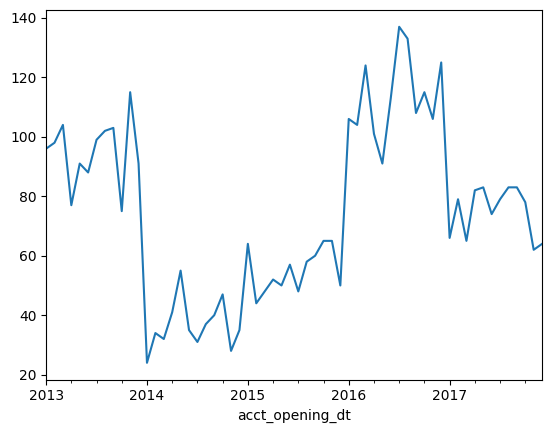

In [ ]:
# We can use this later to build the time series graph (soon!)
acct_opening_monthly = client.groupby(pd.Grouper(key='acct_opening_dt', freq='M')).count()['account_id']
acct_opening_monthly.plot(kind='line')

## Loan

In [ ]:
loan2 = loan.copy()
loan2

,loan_id,account_id,date,principal,duration_month,annual_interest_rate,monthly_payment,total_payment,status,end_date
0,5314,1787,2013-07-05,88833.0,12,0.153592,8033.0,96396,B,2014-07-05
1,5316,1801,2013-07-11,141131.0,36,0.108437,4610.0,165960,A,2016-07-11
2,6863,9188,2013-07-28,94126.0,60,0.125077,2118.0,127080,A,2018-07-28
3,5325,1843,2013-08-03,73372.0,36,0.255593,2939.0,105804,A,2016-08-03
4,7240,11013,2013-09-06,239184.0,60,0.055932,4579.0,274740,A,2018-09-06
...,...,...,...,...,...,...,...,...,...,...
677,4989,105,2018-12-05,313373.0,48,0.059194,7348.0,352704,C,2022-12-05
678,5221,1284,2018-12-05,49835.0,12,0.097703,4376.0,52512,C,2019-12-05
679,6402,6922,2018-12-06,117780.0,24,0.168004,5812.0,139488,C,2020-12-06
680,5346,1928,2018-12-06,48539.0,24,0.134537,2318.0,55632,C,2020-12-06


In [ ]:
loan2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_id               682 non-null    int64         
 1   account_id            682 non-null    int64         
 2   date                  682 non-null    datetime64[ns]
 3   principal             682 non-null    float64       
 4   duration_month        682 non-null    int64         
 5   annual_interest_rate  682 non-null    float64       
 6   monthly_payment       682 non-null    float64       
 7   total_payment         682 non-null    int64         
 8   status                682 non-null    object        
 9   end_date              682 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(3), int64(4), object(1)
memory usage: 53.4+ KB


Let's calculate basic statistics of the loan book
- size of loan book
- volume of loan book
- average ticket size
- average annual interest rate & duration
- active loan (size + volume status C & D)

In [ ]:
# Size of loan book
loan2['loan_id'].count()

682

In [ ]:
# Volume of loan book
loan2['principal'].sum()

79645909.0

In [ ]:
# Average ticket size
loan2['principal'].mean()

116782.857771261

In [ ]:
# Average annual_interest_rate
(loan2['principal'] * loan2['annual_interest_rate']).sum()/(loan2['principal']).sum()

0.14618448353404545

In [ ]:
# Average duration
loan2['duration_month'].mean()

36.49266862170088

In [ ]:
loan2[loan2['status'].isin(['C','D'])].agg(
    {
        'loan_id' : ['count'],
        'principal' : ['sum']
    }
)

,loan_id,principal
count,448.0,NaN
sum,NaN,60369182.0


In [ ]:
# Create loan acquisition trends
# by date, annually/tahunan
loan2[['date','loan_id']].groupby(pd.Grouper(key='date',freq='Y')).count()

,loan_id
date,
2013-12-31,20
2014-12-31,101
2015-12-31,90
2016-12-31,117
2017-12-31,196
2018-12-31,158


In [ ]:
# Monthly
loan2[['date','loan_id']].groupby(pd.Grouper(key='date',freq='M')).count()

,loan_id
date,
2013-07-31,3
2013-08-31,1
2013-09-30,4
2013-10-31,1
2013-11-30,3
...,...
2018-08-31,5
2018-09-30,14
2018-10-31,10


In [ ]:
# Check demographics of loan takers
# by age
loan_client = loan2.merge(client, how='left', left_on='account_id', right_on = 'account_id')
loan_client.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 682 entries, 0 to 681
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_id               682 non-null    int64         
 1   account_id            682 non-null    int64         
 2   date                  682 non-null    datetime64[ns]
 3   principal             682 non-null    float64       
 4   duration_month        682 non-null    int64         
 5   annual_interest_rate  682 non-null    float64       
 6   monthly_payment       682 non-null    float64       
 7   total_payment         682 non-null    int64         
 8   status                682 non-null    object        
 9   end_date              682 non-null    datetime64[ns]
 10  client_id             682 non-null    int64         
 11  client_district_id    532 non-null    float64       
 12  gender                682 non-null    object        
 13  birth_date          

In [ ]:
loan_client[['age_group','loan_id']].groupby('age_group').count()

,loan_id
age_group,
"(15.999, 20.0]",40
"(20.0, 30.0]",139
"(30.0, 40.0]",167
"(40.0, 50.0]",154
"(50.0, 60.0]",155
"(60.0, 81.0]",27


In [ ]:
# Check demographics of loan takers
# by gender
loan_client[['gender','loan_id']].groupby('gender').count()

,loan_id
gender,
F,348
M,334


In [ ]:
# Check demographics of loan takers
# by region
loan_client[['region','loan_id']].groupby('region').count()

,loan_id
region,
Prague,84
central Bohemia,90
east Bohemia,84
north Bohemia,61
north Moravia,117
south Bohemia,60
south Moravia,129
west Bohemia,57


In [ ]:
# kak untuk grouping trend of loan, kalo mau filter condition hanya tahun tertentu (contoh, hanya 2017) gmn ya?
# Cara kedua: filter setelah grouping
annual_loan = loan2[['date','loan_id']].groupby(pd.Grouper(key='date',freq='Y')).count()
annual_loan[annual_loan.index < '2017-12-31']

,loan_id
date,
2013-12-31,20
2014-12-31,101
2015-12-31,90
2016-12-31,117


## Transaction

Let's check what happened in one account

In [ ]:
trans_ex = trans[trans['account_id'] == 863]
trans_ex.head(20)

,trans_id,account_id,date,type,trans_amt,balance_after,transaction_note,bank,trans_info,trans_purpose
2773,251715,863,2013-05-16,CREDIT,300.0,300.0,CREDIT IN CASH,BRK,CREDIT IN CASH,None
3006,251736,863,2013-05-27,CREDIT,17959.0,18259.0,CREDIT IN CASH,BRK,CREDIT IN CASH,None
3027,251738,863,2013-05-28,CREDIT,23132.0,41391.0,CREDIT IN CASH,BRK,CREDIT IN CASH,None
3114,3558684,863,2013-05-31,CREDIT,24.7,41415.7,INTEREST,BRK,NaN,INTEREST
4346,252165,863,2013-06-15,DEBIT,9000.0,32415.7,WITHDRAWAL IN CASH,BRK,WITHDRAWAL IN CASH,None
4419,251733,863,2013-06-17,CREDIT,42155.0,74570.7,CREDIT IN CASH,BRK,CREDIT IN CASH,None
4554,251740,863,2013-06-22,CREDIT,38608.0,113178.7,CREDIT IN CASH,BRK,CREDIT IN CASH,None
4555,252166,863,2013-06-22,DEBIT,52400.0,60778.7,WITHDRAWAL IN CASH,BRK,WITHDRAWAL IN CASH,None
4813,3558685,863,2013-06-30,CREDIT,219.7,60998.4,INTEREST,BRK,NaN,INTEREST
5743,252167,863,2013-07-07,DEBIT,25400.0,79865.4,WITHDRAWAL IN CASH,BRK,WITHDRAWAL IN CASH,None


In [ ]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056320 entries, 0 to 1056319
Data columns (total 10 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   trans_id          1056320 non-null  int64         
 1   account_id        1056320 non-null  int64         
 2   date              1056320 non-null  datetime64[ns]
 3   type              1056320 non-null  object        
 4   trans_amt         1056320 non-null  float64       
 5   balance_after     1056320 non-null  float64       
 6   transaction_note  1056320 non-null  object        
 7   bank              1056320 non-null  object        
 8   trans_info        873206 non-null   object        
 9   trans_purpose     521006 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 80.6+ MB


In [ ]:
trans['trans_id'] = trans['trans_id'].astype(str)

In [ ]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056320 entries, 0 to 1056319
Data columns (total 10 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   trans_id          1056320 non-null  object        
 1   account_id        1056320 non-null  int64         
 2   date              1056320 non-null  datetime64[ns]
 3   type              1056320 non-null  object        
 4   trans_amt         1056320 non-null  float64       
 5   balance_after     1056320 non-null  float64       
 6   transaction_note  1056320 non-null  object        
 7   bank              1056320 non-null  object        
 8   trans_info        873206 non-null   object        
 9   trans_purpose     521006 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 80.6+ MB


In [ ]:
trans[trans.account_id == 863].head()

,trans_id,account_id,date,type,trans_amt,balance_after,transaction_note,bank,trans_info,trans_purpose
2773,251715,863,2013-05-16,CREDIT,300.0,300.0,CREDIT IN CASH,BRK,CREDIT IN CASH,None
3006,251736,863,2013-05-27,CREDIT,17959.0,18259.0,CREDIT IN CASH,BRK,CREDIT IN CASH,None
3027,251738,863,2013-05-28,CREDIT,23132.0,41391.0,CREDIT IN CASH,BRK,CREDIT IN CASH,None
3114,3558684,863,2013-05-31,CREDIT,24.7,41415.7,INTEREST,BRK,NaN,INTEREST
4346,252165,863,2013-06-15,DEBIT,9000.0,32415.7,WITHDRAWAL IN CASH,BRK,WITHDRAWAL IN CASH,None


Let's summarize the transaction behaviour by calculating end-of-month balance, total and frequency of credit/debit transaction, and recency (last time doing transaction)

In [ ]:
# Final end-of-month (EOM) balance is the last transaction of each client on each months
eom_balance_ex = trans.sort_values(by=['account_id','date','trans_id'], ascending=[False,True,True])
eom_balance_ex = eom_balance_ex.groupby(['account_id',pd.Grouper(key='date', freq='M')]).last()[['balance_after']]
eom_balance_ex

balance_after
account_id date                     
1          2015-03-31         1000.0
           2015-04-30        17298.2
           2015-05-31        23156.2
           2015-06-30        26735.8
           2015-07-31        25223.7
...                              ...
11382      2018-08-31        36854.4
           2018-09-30        55145.2
           2018-10-31        54378.2
           2018-11-30        66714.7
           2018-12-31        81675.1

[185057 rows x 1 columns]

<Axes: xlabel='date'>

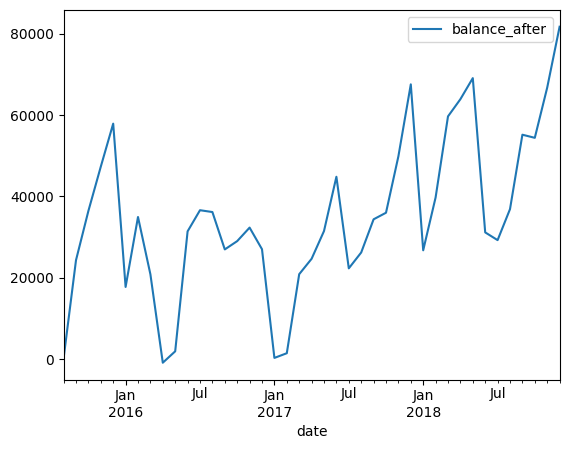

In [ ]:
eom_balance_ex.loc[11382].plot(kind='line')

In [ ]:
# The total debit and credit every month can be calculated as well
debit_ex = trans[trans['type'] == 'DEBIT']
credit_ex = trans[trans['type'] == 'CREDIT']

# Debit
debit_ex2 = debit_ex.groupby(['account_id',pd.Grouper(key='date', freq='M')]).agg({'trans_amt': ['sum','count','mean']})
debit_ex2

trans_amt                    
                            sum count          mean
account_id date                                    
1          2015-06-30     200.0     1    200.000000
           2015-07-31    5300.0     1   5300.000000
           2015-08-31    7514.6     2   3757.300000
           2015-09-30    3166.6     3   1055.533333
           2015-10-31    5366.6     3   1788.866667
...                         ...   ...           ...
11382      2018-08-31   23479.6     4   5869.900000
           2018-09-30   12914.6     2   6457.300000
           2018-10-31   32014.6     3  10671.533333
           2018-11-30   18914.6     2   9457.300000
           2018-12-31   31900.0     2  15950.000000

[171557 rows x 3 columns]

In [ ]:
# Credit
credit_ex2 = credit_ex.groupby(['account_id',pd.Grouper(key='date', freq='M')]).agg({'trans_amt': ['sum','count','mean']})
credit_ex2

trans_amt                    
                            sum count          mean
account_id date                                    
1          2015-03-31    1000.0     1   1000.000000
           2015-04-30   16298.2     3   5432.733333
           2015-05-31    5858.0     3   1952.666667
           2015-06-30    3779.6     2   1889.800000
           2015-07-31    3787.9     2   1893.950000
...                         ...   ...           ...
11382      2018-08-31   31089.9     3  10363.300000
           2018-09-30   31205.4     3  10401.800000
           2018-10-31   31247.6     3  10415.866667
           2018-11-30   31251.1     3  10417.033333
           2018-12-31   46860.4     3  15620.133333

[183971 rows x 3 columns]

In [ ]:
# Recency is the last time do active transaction
# "Active transaction" is defined as WITHDRAWAL IN CASH, REMITTANCE TO OTHER BANK, and CARD TRANSACTIONS
trans['recency'] = round((datetime(year=2018, month=12, day=31) - trans['date'] ) / np.timedelta64(1,'D'))
trans

,trans_id,account_id,date,type,trans_amt,balance_after,transaction_note,bank,trans_info,trans_purpose,recency
0,695247,2378,2013-01-01,CREDIT,700.0,700.0,CREDIT IN CASH,BRK,CREDIT IN CASH,None,2190.0
1,171812,576,2013-01-01,CREDIT,900.0,900.0,CREDIT IN CASH,BRK,CREDIT IN CASH,None,2190.0
2,207264,704,2013-01-01,CREDIT,1000.0,1000.0,CREDIT IN CASH,BRK,CREDIT IN CASH,None,2190.0
3,1117247,3818,2013-01-01,CREDIT,600.0,600.0,CREDIT IN CASH,BRK,CREDIT IN CASH,None,2190.0
4,579373,1972,2013-01-02,CREDIT,400.0,400.0,CREDIT IN CASH,BRK,CREDIT IN CASH,None,2189.0
...,...,...,...,...,...,...,...,...,...,...,...
1056315,3626622,2906,2018-12-31,CREDIT,62.3,13729.4,INTEREST,BRK,NaN,INTEREST,0.0
1056316,3627616,2935,2018-12-31,CREDIT,81.3,19544.9,INTEREST,BRK,NaN,INTEREST,0.0
1056317,3625403,2869,2018-12-31,CREDIT,60.2,14638.3,INTEREST,BRK,NaN,INTEREST,0.0
1056318,3626683,2907,2018-12-31,CREDIT,107.5,23453.6,INTEREST,BRK,NaN,INTEREST,0.0


In [ ]:
recency_trans = trans[trans['trans_info'].isin(['WITHDRAWAL IN CASH','REMITTANCE TO OTHER BANK','CARD TRANSACTIONS'])].copy()
recency_trans

,trans_id,account_id,date,type,trans_amt,balance_after,transaction_note,bank,trans_info,trans_purpose,recency
136,695560,2378,2013-01-31,DEBIT,34700.0,59359.0,WITHDRAWAL IN CASH,BRK,WITHDRAWAL IN CASH,None,2160.0
189,145127,485,2013-02-03,DEBIT,25300.0,46177.9,WITHDRAWAL IN CASH,BRK,WITHDRAWAL IN CASH,None,2157.0
222,1028004,3510,2013-02-06,DEBIT,1600.0,22271.0,WITHDRAWAL IN CASH,BRK,WITHDRAWAL IN CASH,None,2154.0
233,695340,2378,2013-02-07,DEBIT,9612.0,80033.7,REMITTANCE TO OTHER BANK|UTILITIES PAYMENT by ...,EF,REMITTANCE TO OTHER BANK,UTILITIES PAYMENT by SIPO,2153.0
249,622121,2122,2013-02-07,DEBIT,14100.0,32859.1,WITHDRAWAL IN CASH,BRK,WITHDRAWAL IN CASH,None,2153.0
...,...,...,...,...,...,...,...,...,...,...,...
1055233,3607597,2346,2018-12-31,DEBIT,14.9,-2236.1,WITHDRAWAL IN CASH|OVERDRAFT FEE,BRK,WITHDRAWAL IN CASH,OVERDRAFT FEE,0.0
1055579,3668638,5066,2018-12-31,DEBIT,3.5,59668.6,WITHDRAWAL IN CASH|OVERDRAFT FEE,BRK,WITHDRAWAL IN CASH,OVERDRAFT FEE,0.0
1055639,3489430,7520,2018-12-31,DEBIT,67.2,-11020.6,WITHDRAWAL IN CASH|OVERDRAFT FEE,BRK,WITHDRAWAL IN CASH,OVERDRAFT FEE,0.0
1055676,3488804,7465,2018-12-31,DEBIT,0.8,84975.0,WITHDRAWAL IN CASH|OVERDRAFT FEE,BRK,WITHDRAWAL IN CASH,OVERDRAFT FEE,0.0


In [ ]:
# This one took a while, no worries.
recency = pd.DataFrame(recency_trans.groupby(['account_id']).min()['recency'])
recency

<ipython-input-64-3c6f730f1fdb>:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.min is deprecated. In a future version, a TypeError will be raised. Before calling .min, select only columns which should be valid for the function.
  recency = pd.DataFrame(recency_trans.groupby(['account_id']).min()['recency'])


,recency
account_id,
1,26.0
2,14.0
3,7.0
4,18.0
5,6.0
...,...
11333,5.0
11349,5.0
11359,10.0


In [ ]:
# We can merge by index
transaction_behaviour = eom_balance_ex.merge(debit_ex2, how='outer', left_index=True, right_index=True)
transaction_behaviour = transaction_behaviour.merge(credit_ex2, how='outer', left_index=True, right_index=True)
transaction_behaviour

<ipython-input-65-6d8e52fa5436>:2: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  transaction_behaviour = eom_balance_ex.merge(debit_ex2, how='outer', left_index=True, right_index=True)
<ipython-input-65-6d8e52fa5436>:3: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  transaction_behaviour = transaction_behaviour.merge(credit_ex2, how='outer', left_index=True, right_index=True)


balance_after  ('trans_amt', 'sum')_x  \
account_id date                                                
1          2015-03-31         1000.0                     NaN   
           2015-04-30        17298.2                     NaN   
           2015-05-31        23156.2                     NaN   
           2015-06-30        26735.8                   200.0   
           2015-07-31        25223.7                  5300.0   
...                              ...                     ...   
11382      2018-08-31        36854.4                 23479.6   
           2018-09-30        55145.2                 12914.6   
           2018-10-31        54378.2                 32014.6   
           2018-11-30        66714.7                 18914.6   
           2018-12-31        81675.1                 31900.0   

                       ('trans_amt', 'count')_x  ('trans_amt', 'mean')_x  \
account_id date                                                            
1          2015-03-31                       NaN                      NaN   
           2015-04-30                       NaN                      NaN   
           2015-05-31                       NaN                      NaN   
           2015-06-30                       1.0               200.000000   
           2015-07-31                       1.0              5300.000000   
...                                         ...                      ...   
11382      2018-08-31                       4.0              5869.900000   
           2018-09-30                       2.0              6457.300000   
           2018-10-31                       3.0             10671.533333   
           2018-11-30                       2.0              9457.300000   
           2018-12-31                       2.0             15950.000000   

                       (trans_amt, sum)  (trans_amt, count)  (trans_amt, mean)  
account_id date                                                                 
1          2015-03-31            1000.0                 1.0        1000.000000  
           2015-04-30           16298.2                 3.0        5432.733333  
           2015-05-31            5858.0                 3.0        1952.666667  
           2015-06-30            3779.6                 2.0        1889.800000  
           2015-07-31            3787.9                 2.0        1893.950000  
...                                 ...                 ...                ...  
11382      2018-08-31           31089.9                 3.0       10363.300000  
           2018-09-30           31205.4                 3.0       10401.800000  
           2018-10-31           31247.6                 3.0       10415.866667  
           2018-11-30           31251.1                 3.0       10417.033333  
           2018-12-31           46860.4                 3.0       15620.133333  

[185057 rows x 7 columns]

In [ ]:
#Flatten the column
transaction_behaviour.columns = transaction_behaviour.columns.map('_'.join)

# Rename all columns
transaction_behaviour.columns = ['eom_balance','debit_total','debit_cnt','debit_avg','credit_total','credit_cnt','credit_avg']

In [ ]:
# Reset_index
transaction_behaviour

eom_balance  debit_total  debit_cnt     debit_avg  \
account_id date                                                            
1          2015-03-31       1000.0          NaN        NaN           NaN   
           2015-04-30      17298.2          NaN        NaN           NaN   
           2015-05-31      23156.2          NaN        NaN           NaN   
           2015-06-30      26735.8        200.0        1.0    200.000000   
           2015-07-31      25223.7       5300.0        1.0   5300.000000   
...                            ...          ...        ...           ...   
11382      2018-08-31      36854.4      23479.6        4.0   5869.900000   
           2018-09-30      55145.2      12914.6        2.0   6457.300000   
           2018-10-31      54378.2      32014.6        3.0  10671.533333   
           2018-11-30      66714.7      18914.6        2.0   9457.300000   
           2018-12-31      81675.1      31900.0        2.0  15950.000000   

                       credit_total  credit_cnt    credit_avg  
account_id date                                                
1          2015-03-31        1000.0         1.0   1000.000000  
           2015-04-30       16298.2         3.0   5432.733333  
           2015-05-31        5858.0         3.0   1952.666667  
           2015-06-30        3779.6         2.0   1889.800000  
           2015-07-31        3787.9         2.0   1893.950000  
...                             ...         ...           ...  
11382      2018-08-31       31089.9         3.0  10363.300000  
           2018-09-30       31205.4         3.0  10401.800000  
           2018-10-31       31247.6         3.0  10415.866667  
           2018-11-30       31251.1         3.0  10417.033333  
           2018-12-31       46860.4         3.0  15620.133333  

[185057 rows x 7 columns]

<Axes: xlabel='date'>

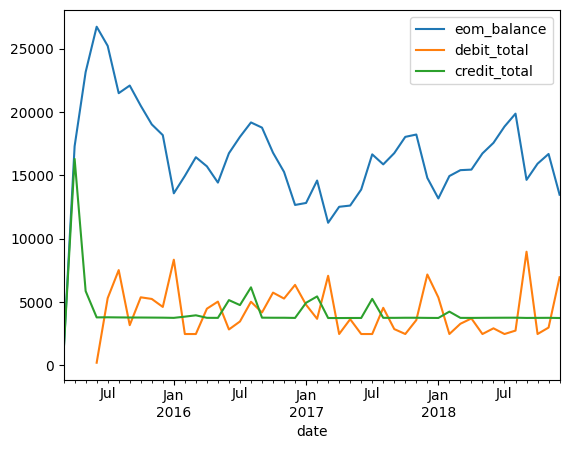

In [ ]:
# Transaction behaviour of one client
transaction_behaviour.loc[1][['eom_balance','debit_total','credit_total']].plot(kind='line')

In [ ]:
# Let's make it into separate dataset
trans_behaviour = transaction_behaviour.reset_index()
trans_behaviour

,account_id,date,eom_balance,debit_total,debit_cnt,debit_avg,credit_total,credit_cnt,credit_avg
0,1,2015-03-31,1000.0,NaN,NaN,NaN,1000.0,1.0,1000.000000
1,1,2015-04-30,17298.2,NaN,NaN,NaN,16298.2,3.0,5432.733333
2,1,2015-05-31,23156.2,NaN,NaN,NaN,5858.0,3.0,1952.666667
3,1,2015-06-30,26735.8,200.0,1.0,200.000000,3779.6,2.0,1889.800000
4,1,2015-07-31,25223.7,5300.0,1.0,5300.000000,3787.9,2.0,1893.950000
...,...,...,...,...,...,...,...,...,...
185052,11382,2018-08-31,36854.4,23479.6,4.0,5869.900000,31089.9,3.0,10363.300000
185053,11382,2018-09-30,55145.2,12914.6,2.0,6457.300000,31205.4,3.0,10401.800000
185054,11382,2018-10-31,54378.2,32014.6,3.0,10671.533333,31247.6,3.0,10415.866667
185055,11382,2018-11-30,66714.7,18914.6,2.0,9457.300000,31251.1,3.0,10417.033333


In [ ]:
trans_behaviour[['date','eom_balance']].groupby('date').sum()

,eom_balance
date,
2013-01-31,632662.9
2013-02-28,2796280.0
2013-03-31,5777150.3
2013-04-30,9049317.0
2013-05-31,12693703.3
...,...
2018-08-31,169245541.2
2018-09-30,173384847.0
2018-10-31,175591087.3


In [ ]:
# Let's inspect the total of balance over month
tb = trans_behaviour[['date','eom_balance']].groupby('date').sum()
tb.to_csv('tb.csv')

# Stop here

In [ ]:
# And save the data for latest month in 2018
dec_trans_behaviour = trans_behaviour[trans_behaviour['date'] == '2018-12-31'].copy()
dec_trans_behaviour = recency.merge(dec_trans_behaviour, how='left', left_on = 'account_id', right_on='account_id')
dec_trans_behaviour

,account_id,recency,date,eom_balance,debit_total,debit_cnt,debit_avg,credit_total,credit_cnt,credit_avg
0,1,26.0,2018-12-31,13466.5,6952.0,2.0,3476.000000,3731.6,2.0,1865.800000
1,2,14.0,2018-12-31,42627.7,24466.0,5.0,4893.200000,30510.7,2.0,15255.350000
2,3,7.0,2018-12-31,51096.2,7561.0,4.0,1890.250000,11462.6,2.0,5731.300000
3,4,18.0,2018-12-31,33720.6,3963.0,3.0,1321.000000,5688.7,2.0,2844.350000
4,5,6.0,2018-12-31,28088.6,6738.0,5.0,1347.600000,5139.1,2.0,2569.550000
...,...,...,...,...,...,...,...,...,...,...
4495,11333,5.0,2018-12-31,58319.7,17100.0,3.0,5700.000000,365.0,2.0,182.500000
4496,11349,5.0,2018-12-31,33978.2,65691.0,8.0,8211.375000,63168.0,2.0,31584.000000
4497,11359,10.0,2018-12-31,75201.0,29372.0,6.0,4895.333333,40803.6,2.0,20401.800000
4498,11362,12.0,2018-12-31,38530.9,13567.0,6.0,2261.166667,24374.8,2.0,12187.400000


In [ ]:
dec_trans_behaviour['eom_balance'].describe()

count      4424.000000
mean      44212.309177
std       25360.579582
min      -25821.000000
25%       23380.775000
50%       38864.100000
75%       60835.650000
max      138317.800000
Name: eom_balance, dtype: float64

In [ ]:
dec_trans_behaviour['credit_cnt'].describe()

count    4367.000000
mean        2.163270
std         0.626669
min         1.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         7.000000
Name: credit_cnt, dtype: float64

In [ ]:
dec_trans_behaviour['recency'].describe()

count    4500.000000
mean       15.681556
std        34.249885
min         0.000000
25%         6.000000
50%        13.000000
75%        19.000000
max       858.000000
Name: recency, dtype: float64

# Plotting & Visualization using Matplotlib

Let's create visualization of our data using Matplotlib

### Pie chart

In [ ]:
client_gender = pd.DataFrame(client['gender'].value_counts())
client_gender['nama_gender'] = ['Male','Female']
client_gender

,gender,nama_gender
M,2292,Male
F,2208,Female


<Axes: >

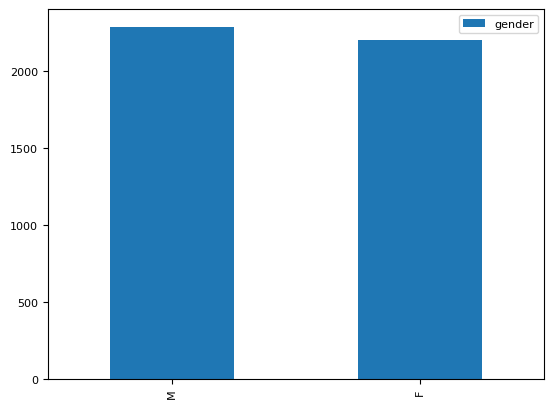

In [ ]:
client_gender.plot(kind='bar')

<Axes: >

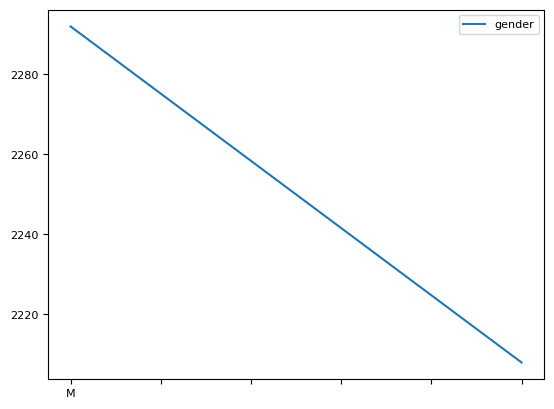

In [ ]:
client_gender.plot(kind='line')

array([<Axes: ylabel='gender'>], dtype=object)

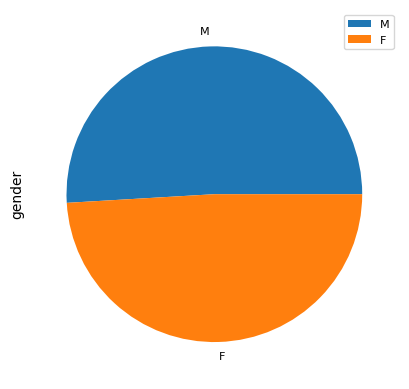

In [ ]:
client_gender.plot(kind='pie',subplots=True)

<Axes: >

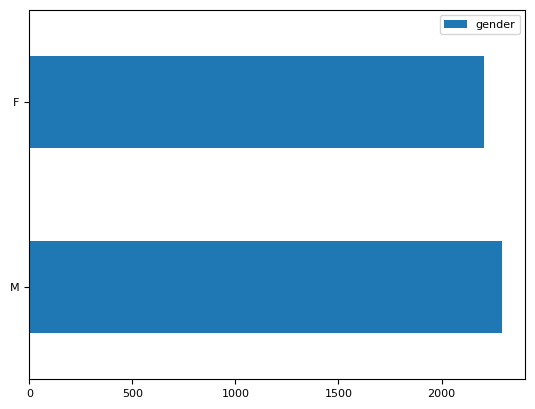

In [ ]:
client_gender.plot(kind='barh')

array([<Axes: ylabel='gender'>], dtype=object)

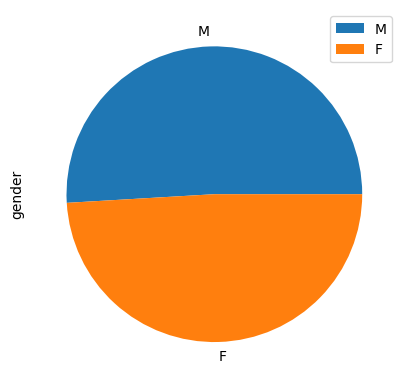

In [ ]:
client_gender.plot(kind='pie',subplots=True)

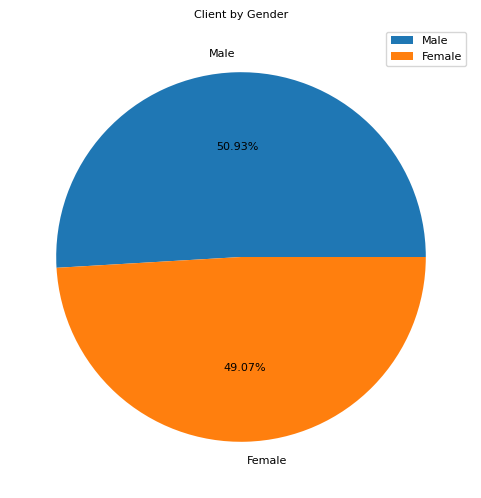

In [ ]:
# In Matplotlib, we need to define the figure and axes
fig, ax = plt.subplots(1,1,figsize=(6,6))
# Then, we draw charts on the axis.
ax.pie(client_gender['gender'], labels=client_gender['nama_gender'], autopct='%1.2f%%')
# We can set many attribute of the axes, including title & legend
ax.set_title('Client by Gender')
ax.legend()
# Then we end the chart by showing the figure
fig.show()

### Horizontal Bar chart

In [ ]:
client_region = pd.DataFrame(client['region'].value_counts())
client_region

,region
north Moravia,793
south Moravia,778
central Bohemia,574
Prague,554
east Bohemia,544
north Bohemia,457
west Bohemia,430
south Bohemia,370


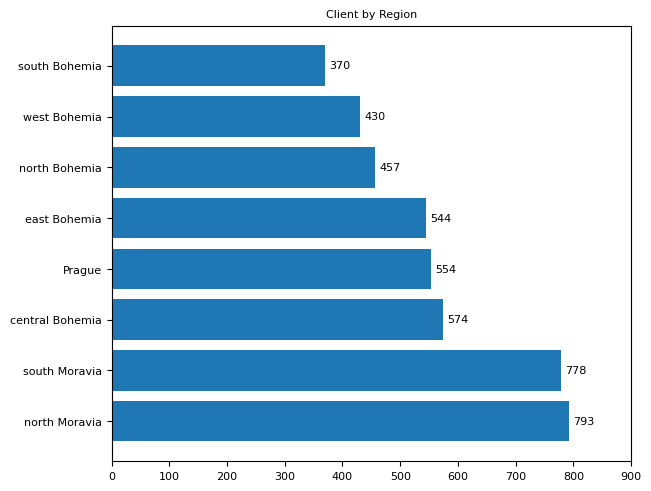

In [ ]:
# In Matplotlib, we need to define the figure and axes
fig, ax = plt.subplots(layout='constrained')

# Then, we draw charts on the axis.
# For label, you typically store the axes on a variable and refer it later
ax1 = ax.barh(client_region.index, client_region['region'])

# We can set many attribute of the axes, including title & legend
ax.bar_label(ax1, padding=3)
ax.set_title('Client by Region')
ax.set_xlim(0,900)

# Then we end the chart by showing the figure
fig.show()

### Bar chart

In [ ]:
# We can use the age group
client_age = pd.DataFrame(client['age_group'].value_counts().sort_index())
client_age.index = client_age.index.astype(str)
client_age

,age_group
"(15.999, 20.0]",290
"(20.0, 30.0]",886
"(30.0, 40.0]",819
"(40.0, 50.0]",797
"(50.0, 60.0]",848
"(60.0, 81.0]",860


In [ ]:
client_age.index

Index(['(15.999, 20.0]', '(20.0, 30.0]', '(30.0, 40.0]', '(40.0, 50.0]',
       '(50.0, 60.0]', '(60.0, 81.0]'],
      dtype='object')

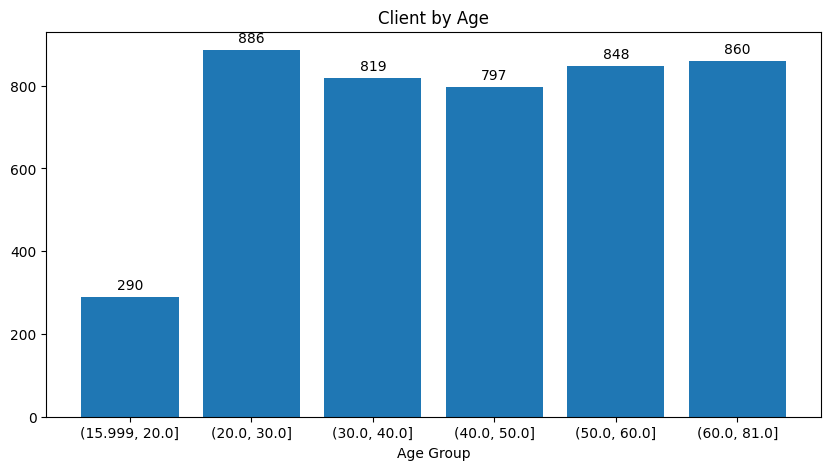

In [ ]:
# In Matplotlib, we need to define the figure and axes
fig, ax = plt.subplots(figsize=(10,5))

# Then, we draw charts on the axis.
# For label, you typically store the axes on a variable and refer it later
ax1 = ax.bar(client_age.index, client_age['age_group'])

# We can set many attribute of the axes, including title & legend
ax.bar_label(ax1, padding=3)
ax.set_title('Client by Age')
ax.set_xlabel('Age Group')

# Then we end the chart by showing the figure
fig.show()

### Line Chart

In [ ]:
# Grouping by monthly and calculate account opened each month
client_acq = pd.DataFrame(client.groupby(pd.Grouper(key='acct_opening_dt', freq='M')).count()['account_id'])
client_acq

,account_id
acct_opening_dt,
2013-01-31,96
2013-02-28,98
2013-03-31,104
2013-04-30,77
2013-05-31,91
2013-06-30,88
2013-07-31,99
2013-08-31,102
2013-09-30,103


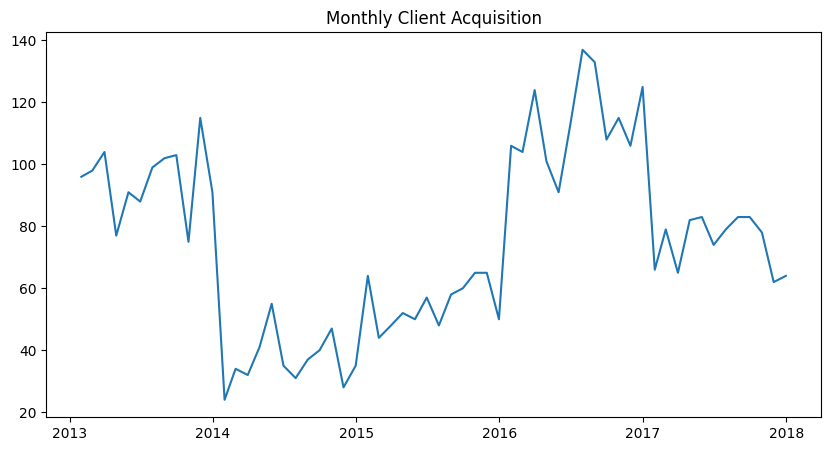

In [ ]:
# In Matplotlib, we need to define the figure and axes
fig, ax = plt.subplots(figsize=(10,5))

# Then, we draw charts on the axis.
# For label, you typically store the axes on a variable and refer it later
ax1 = ax.plot(client_acq.index, client_acq['account_id'])

ax.set_title('Monthly Client Acquisition')

# Then we end the chart by showing the figure
fig.show()

### Subplots -- Combine All Together

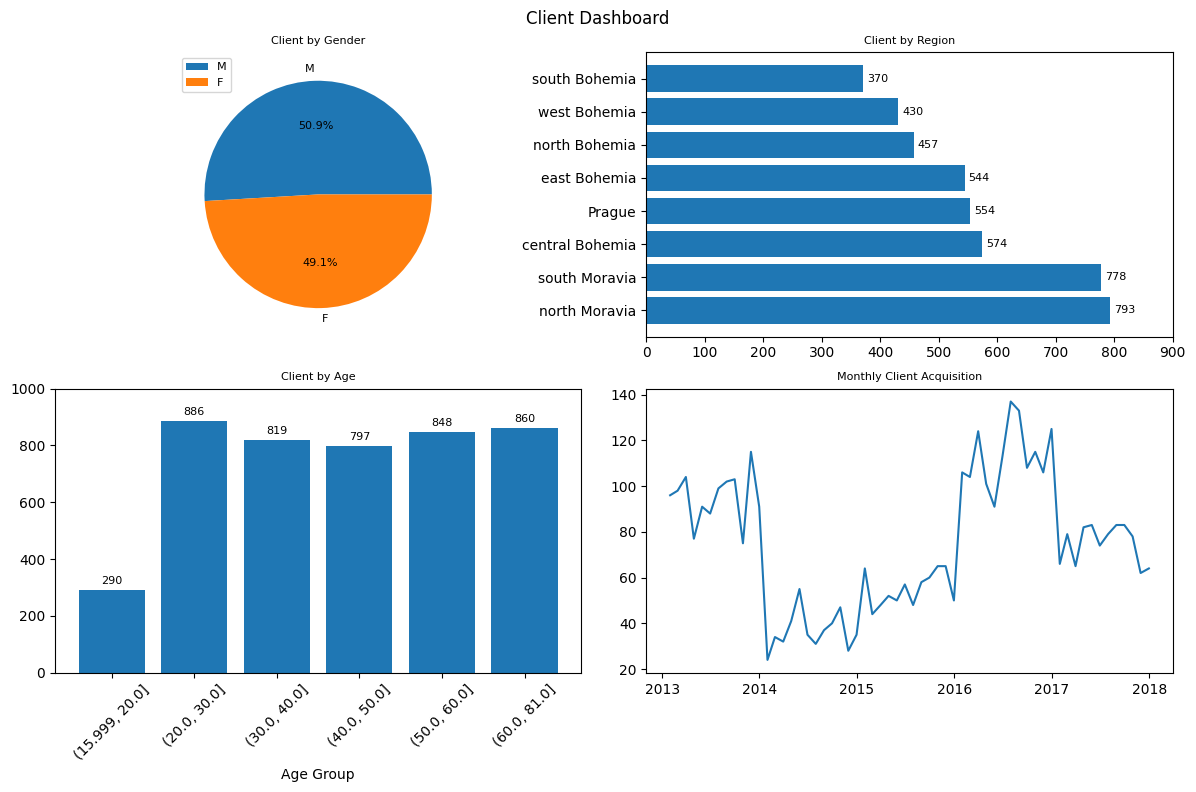

In [ ]:
fig = plt.figure(figsize=(12,8))

# Add 4 subplots in 2x2 grid
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

# Get smaller font size
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# First axis
ax1.pie(client_gender['gender'], labels=client_gender.index, autopct='%1.1f%%')
ax1.set_title('Client by Gender')
ax1.legend(loc = 'upper left')

# Second axis
ax2_container = ax2.barh(client_region.index, client_region['region'])
ax2.bar_label(ax2_container, padding=3)
ax2.set_title('Client by Region')
ax2.set_xlim(0,900)

# Third axis
ax3_container = ax3.bar(client_age.index, client_age['age_group'])
ax3.bar_label(ax3_container, padding=3)
ax3.set_title('Client by Age')
ax3.set_xlabel('Age Group')
ax3.set_ylim(0,1000)

# Rotate the xticks on third axis
plt.sca(ax3)
plt.xticks(rotation=45)

# Fourth axis
ax4.plot(client_acq.index, client_acq['account_id'])
ax4.set_title('Monthly Client Acquisition')

# Set figure's title
fig.suptitle("Client Dashboard")

plt.tight_layout()

# Save to PNG file
plt.savefig('/content/client_dashboard.png')

plt.show()
